# Introduction
## Types of Machine Learning
### Supervised ML
Each input has an explicit output, like a label or number.
Its goal is to find relations between in- and output.

The trained model can be used in an application.

#### Classification
Has labels as target (output), these are discrete values.
Used to predict e.g.  genre of a song.

#### Regression
Output is a numeric continuous value, like stock prices.

#### Instance Based Learning
- Uses data directly instead of deriving an explicit model
- No explicit training = high speed training
- Easy adaptation for new data: no training required
- No abstraction of original data: storage requirements huge
- Model size grows with amount of data
- Therefore: low speed classification

#### Lazy Learning
- Lazy means to delay a task until the result is requested
- Lazy Learning: does not learn until learned model is requested

### Unsupervised ML
No output, the goal is to find relations between samples, e.g. clustering.

### Others
- Reinforcement learning, use a reward function with an agent, actions in an environment (states) in a feedback-update-loop to continuously update the model.
- Deep learning, deep neural networks, combines supervised, unsupervised and some other techniques

## Glossary
- Model: Relations in data that we model. In supervised learning: regression/classification model that is trained on our data.
- Model type/class: The underlying algorithm that is used to create the model, like SVM or KNN.
- Model parameters: Model parameters are what the models learn from data during training *on its own*
- Hyperparameters: They are the parameters for the algorithm and influence
    - how the model learns from the data
    - the model's complexity. Hyperparameters can be tuned to change the models' behaviour.
- Training: Fitting the model to the data.
- Evaluation/Test: Check how the model performs on test data.
- Features/Predictors/Dimensions: measurable property, usually the columns in a csv.
- Sample: one data point or one row in a csv-file

## Basic ML Workflow
![Basic ML Workflow](img/ml_workflow.png)

## Type III Error
*Provide the right answer to the wrong question.*

Often occurs when the dataset is not fully understood or some kind of pattern occurs in it, that does not occur naturally.
For example, model learns that every second sample is of type `A`.

Use common sense and intuition!

[Some examples](https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vRPiprOaC3HsCf5Tuum8bRfzYUiKLRqJmbOoC-32JorNdfyTiRRsR7Ea5eWtvsWzuxo8bjOxCG84dAg/pubhtml?pli=1)

# Visualization
Visualization helps to understand data.
It shows patterns in datasets.

## What to look at first
1. Before you even visualize anything, the basics: Size of dataframe? Datatypes? Class distributions? Basic stats per features? Is there data missing? (NA, etc?)
2. Distribution of individual features: consider visualizing
3. Relations between features: consider visualizing

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=["sepal_length", "sepal_width", "petal_length", "petal_width", 'target'])
df["target"] = df["target"].apply(lambda x: iris.target_names[int(x)])
df.shape  # the dimensions of the dataframe/dataset

(150, 5)

In [29]:
df.dtypes  # the datatype of each dimension

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target           object
dtype: object

In [30]:
df.describe()  # shows for each numerical feature the mean, std, max, quantiles

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Classification: class distribution
Balanced data sets make things easier, but in reality often unequally distributed

## Regression: distribution of target variable
Similar problem: distribution not equal or does not cover complete target range

## Scatterplot
- pairplot, xyplot, etc
- shows relations between 2 feature
- Classification: color, symbol can indicate class label


<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

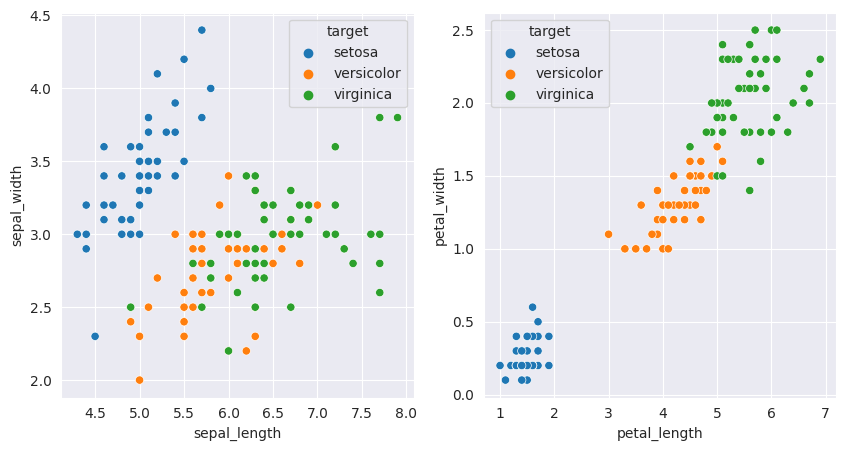

In [31]:
from matplotlib import pyplot as plt
import seaborn as sn

_, ax = plt.subplots(1, 2, figsize=(10, 5))

sn.scatterplot(df[["sepal_length", "sepal_width", "target"]], x="sepal_length", y="sepal_width", hue="target", ax=ax[0])
sn.scatterplot(df[["petal_length", "petal_width", "target"]], x="petal_length", y="petal_width", hue="target", ax=ax[1])


## Scatterplot Matrix
Can show correlation between features, but can be messy with high dimensional datasets.

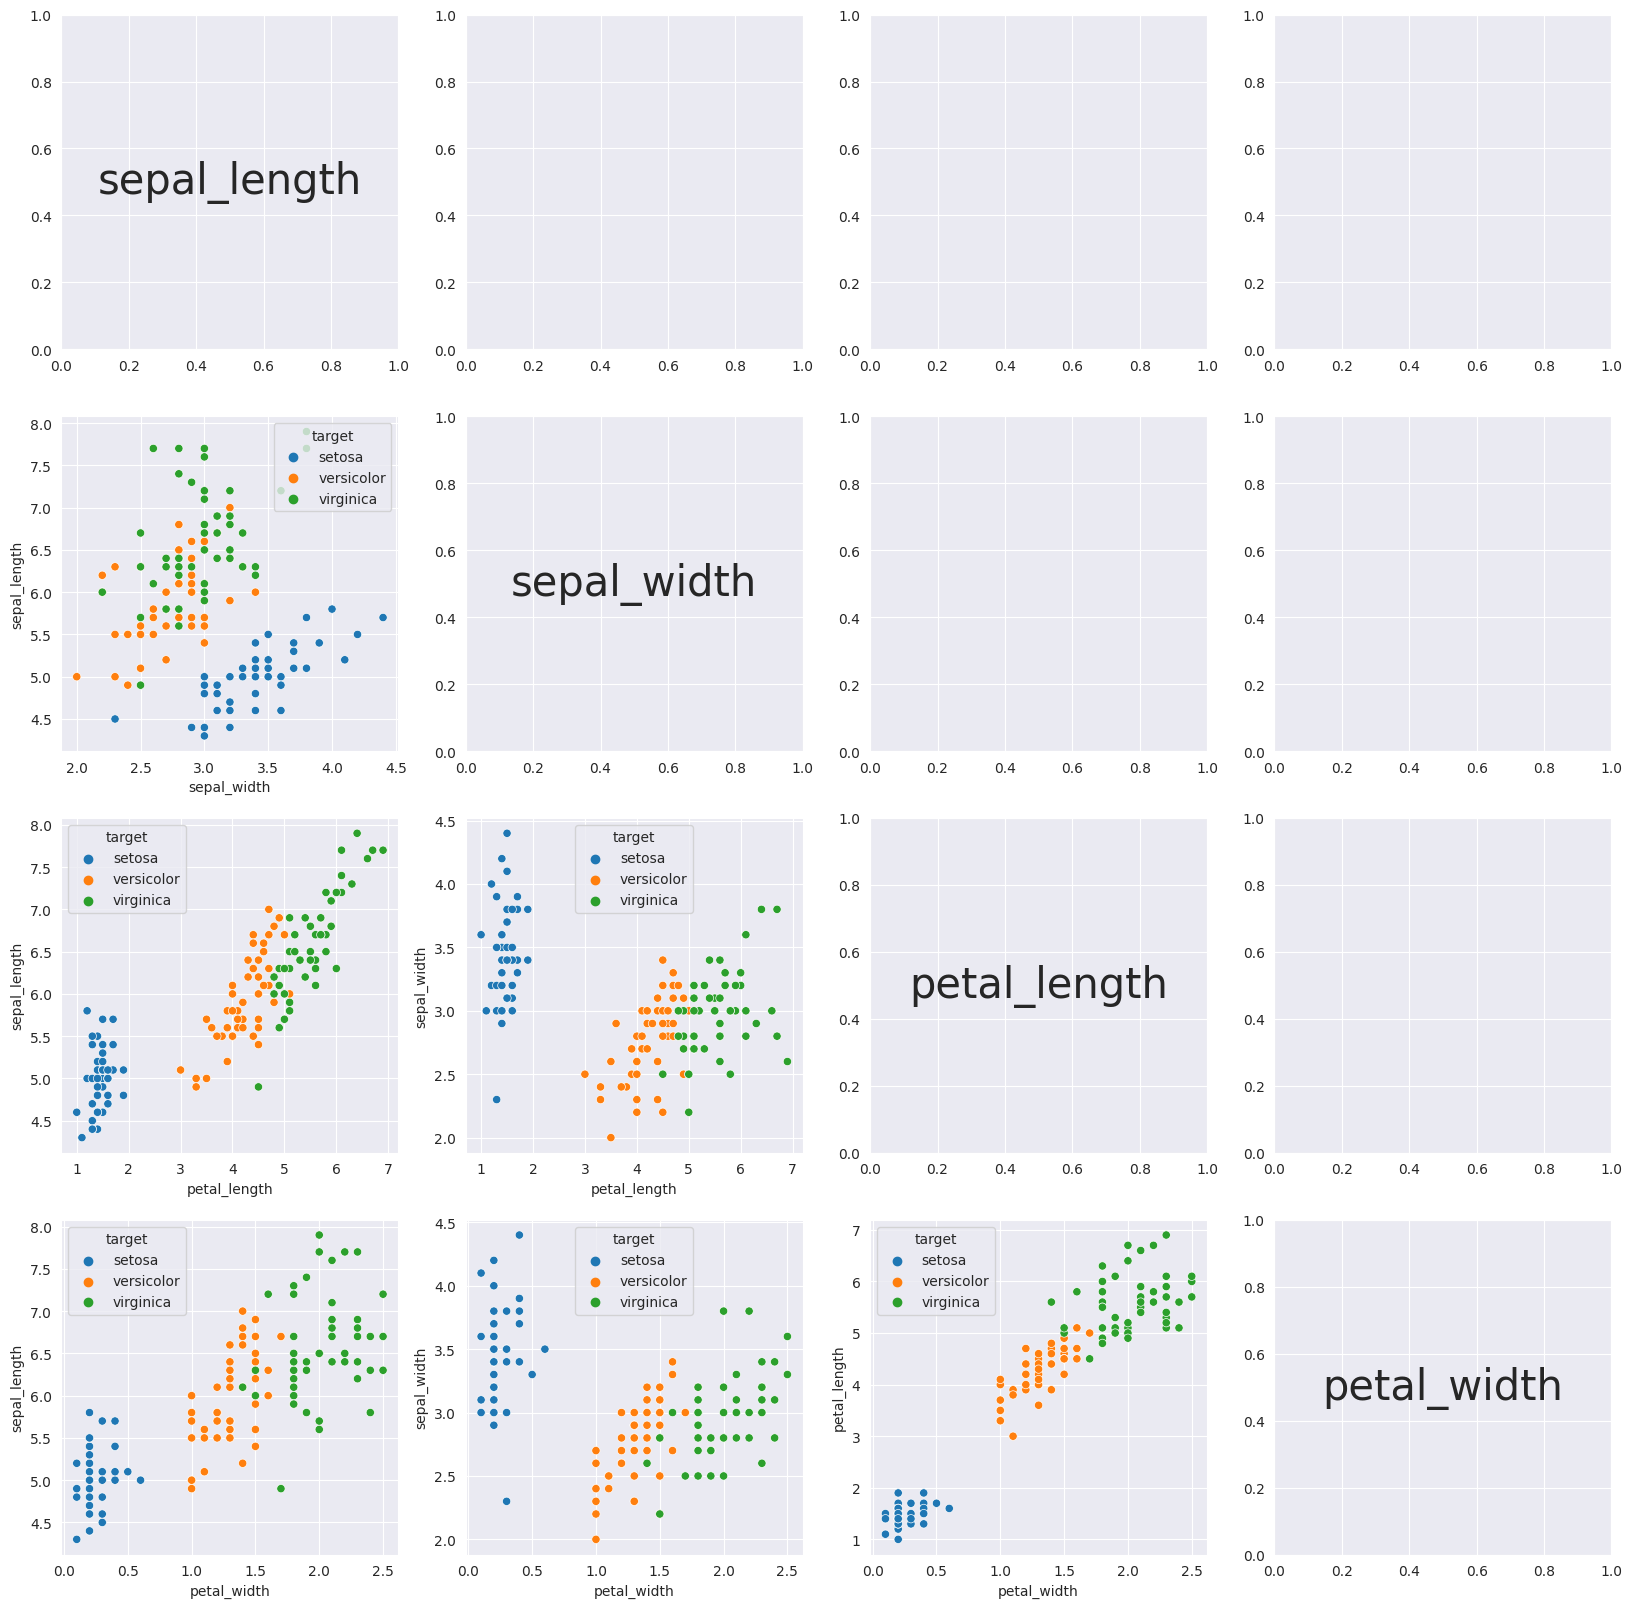

In [32]:
_, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, col in enumerate(df.drop("target", axis=1).columns):
    for j, inner_col in enumerate(df.drop("target", axis=1).columns):
        if col == inner_col:
            ax[i, j].text(0.5, 0.5, col, ha='center', va='center', size=30)
            break
        sn.scatterplot(df[[col, inner_col, "target"]], x=col, y=inner_col, hue="target", ax=ax[i, j])
plt.show()

## Densityplot
- Density of distribution of single variable
- Sometimes plots individual samples with scatter for better understanding of data
- Kernel parameter: defines granularity of density estimate
- Classification: the more feature densities of different classes overlap, the more similar is the feature
- Differences in density: feature poss. captures some differences in classes

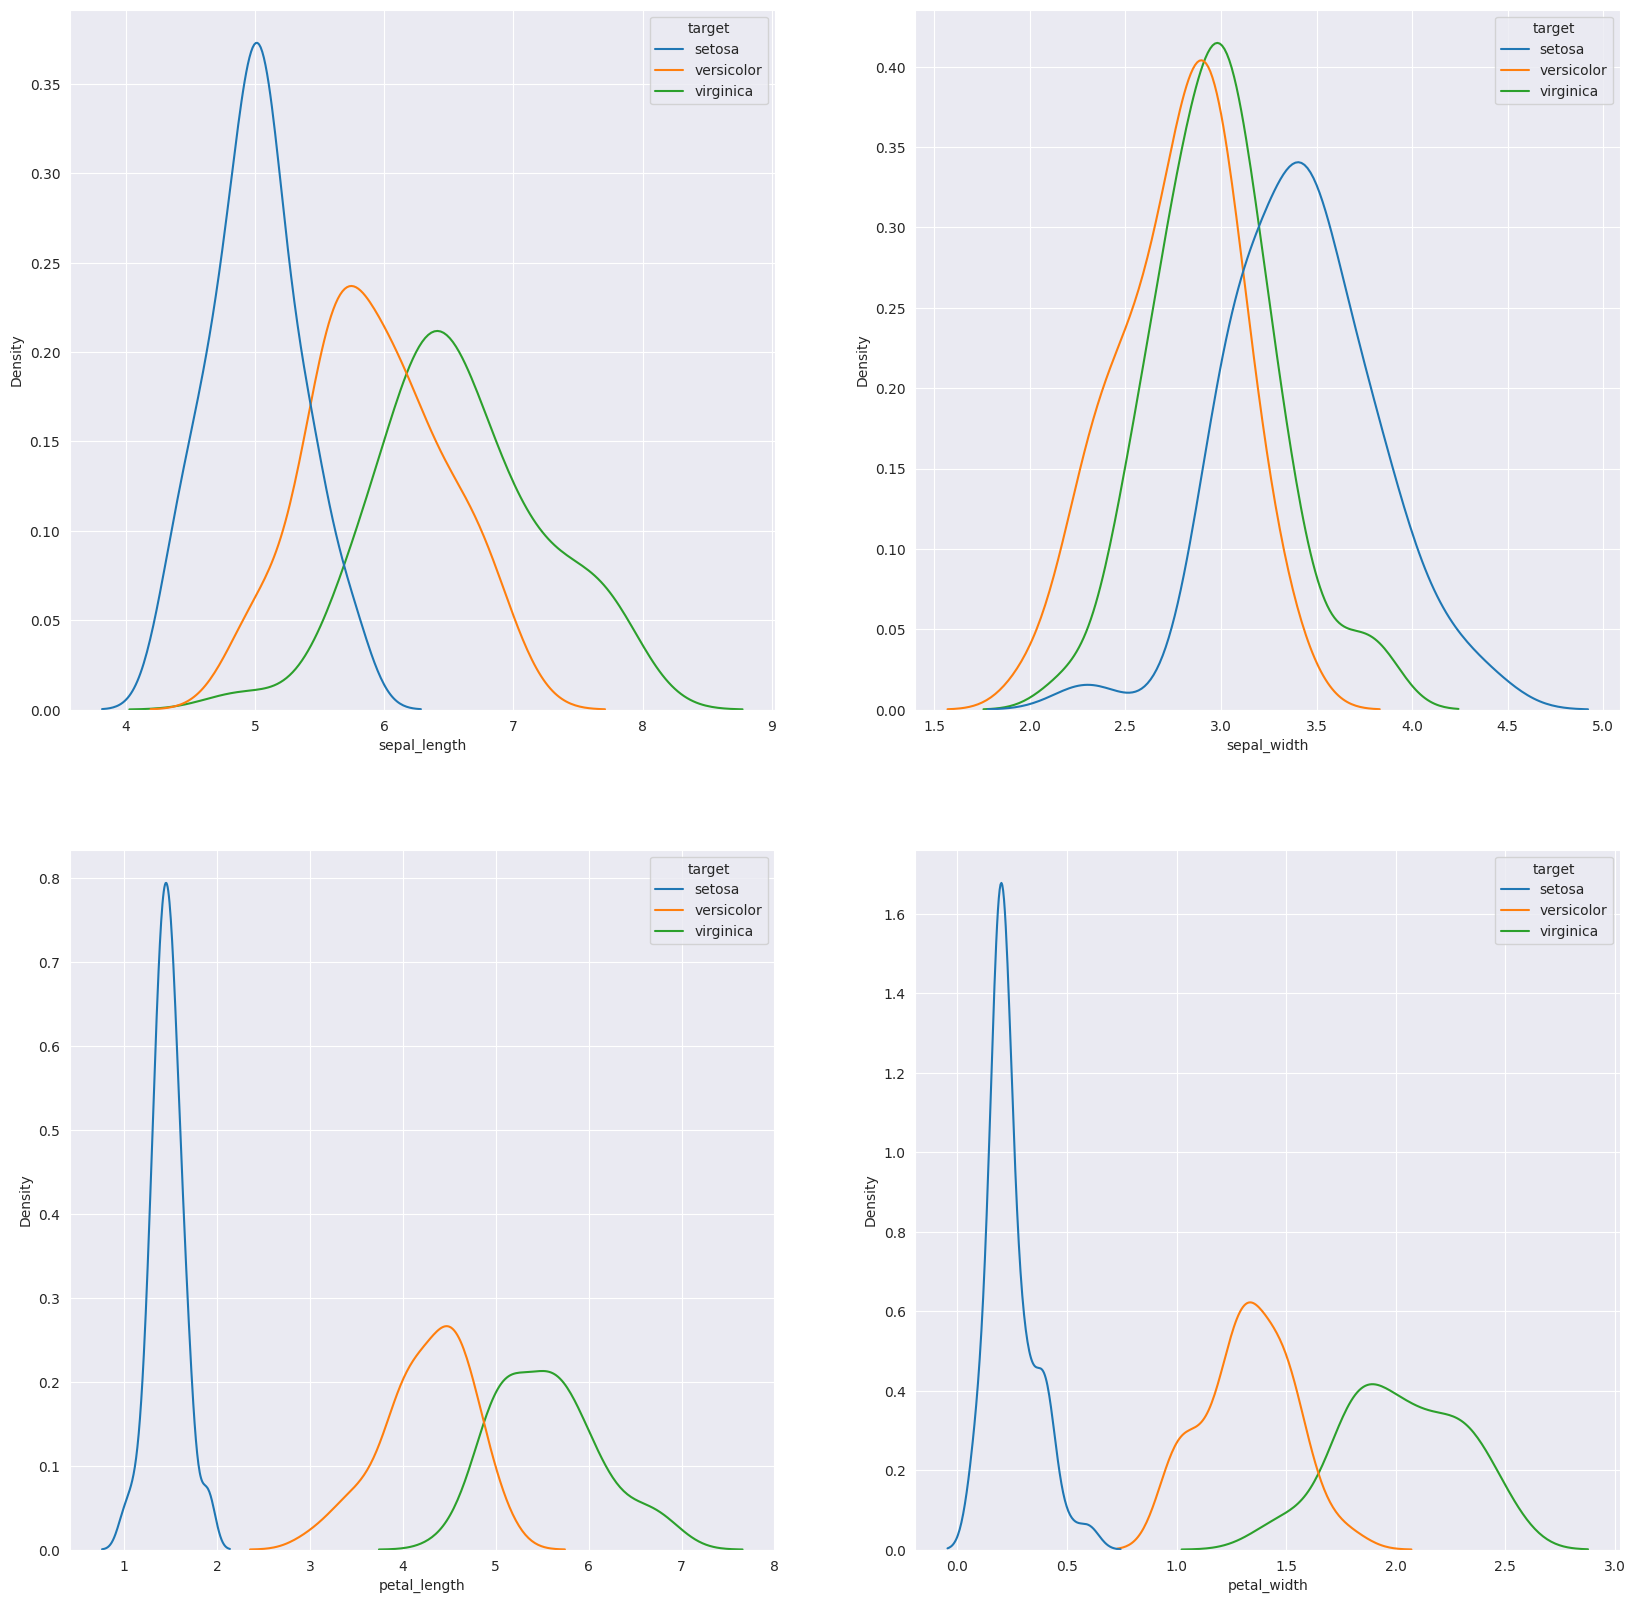

In [33]:
_, ax = plt.subplots(2, 2, figsize=(20, 20))

for i, col in enumerate(df.drop("target", axis=1)):
    sn.kdeplot(df, x=col, hue="target", ax=ax[i // 2, i % 2])
plt.show()

## Histogram
Nr. of bins change how many bars are used in a histogram.
See also: Binning

<AxesSubplot: xlabel='sepal_length', ylabel='Count'>

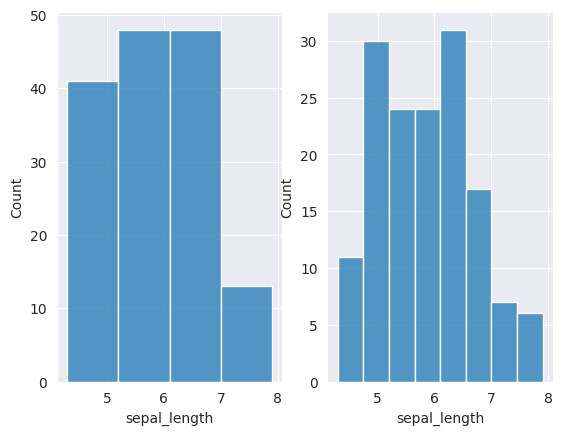

In [34]:
_, ax = plt.subplots(1, 2)
sn.histplot(df, x="sepal_length", bins=4, ax=ax[0])
sn.histplot(df, x="sepal_length", bins=8, ax=ax[1])

## Boxplot (=box-and-whisker-plot)
Shows distribution of one variable as the variables quartiles.

Quartiles != quantiles

It's a form of quantiles using 3 separations that results into 4 parts.
Each part holds ~25% of the data samples.
- Q1: 25% below, 75% above
- Q2: median, 50% below, 50% above
- Q3: 75% below, 25% above

There are also percentiles: if X is the 80% percentile -> 80% of samples below X

The dots in a boxplot are the extrem outliers, the box contains 50% of the data.

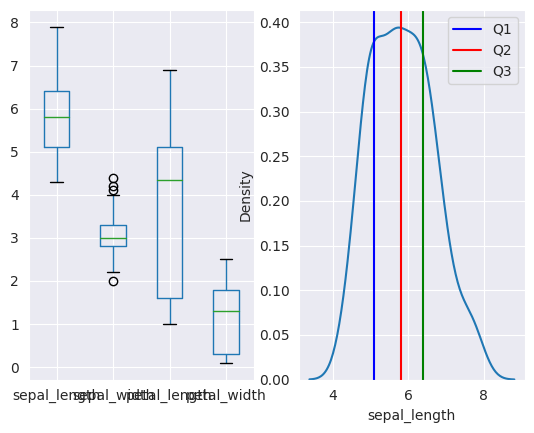

In [35]:
_, ax = plt.subplots(1, 2)
df.boxplot(ax=ax[0])
q = df["sepal_length"].quantile([0.25, 0.5, 0.75])
sn.kdeplot(df, x="sepal_length", ax=ax[1])
ax[1].axvline(x=q[0.25], color='blue', label="Q1")
ax[1].axvline(x=q[0.5], color='red', label="Q2")
ax[1].axvline(x=q[0.75], color='green', label="Q3")
ax[1].legend(loc=1)

## Levelplot / Contourplot
Shows 3D data as 2D + color/gradient.
Works well in a discrete space (3D grid) -> can be used to show model quality over a 2D hyperparameter space.

**Always use a legend!**

Could not use seaborn to create a levelplot, but a heatmap is possible.
See correlation plot.

# Models
This section will show what models exist.
First, some information how to find the best model (Regression and Classification Page 18).

## How to find the optimal model?
**These concepts apply to many models!**
### Closed Form

- Solve using equations: done as matrix operation in ML software
- Resulting equation parameters correspond to plane that minimizes error respectively to the error function. for example SSE
- Possible for linear and polynomial regression – not possible for many other, more complex problems
- Is a one step solution, therefore faster
- Closed-Form usually restricted

### Gradient Descent
- Solves the problem in iterations
- Multistep-process, usually slower
- Can be applied more broadly
- -> More details later

## Feature Space
The samples are in this space and one sample is one point in this space.
The space can be seen if the samples are visualized.

## Model Parameter Space
Depicts models, the models parameters are the coordinates in the space.
Can be used to build a fitness landscape.
Again one model is one point int he model parameter space.

Page 26 in Regression and Classification.

## Learning Rate
Influences the amount of change applied to model parameters in each iteration.
Often a factor between 0 - 1, where 0=no change, 1=max change

If the learning rate is too low, the changes are going to be too small and optimization of the parameters will take too long.
If the learning rate is too high the changes are going to be too big and the model will jump over optimal solutions.

Both might find a local optima, but a learning rate that is too high will lead to a model jumping out of the optima.

## Multiclass Problem
Binary Class Problem: only two classes Positive and Negative class.

Just look at it like a binary class problem:
- 1 vs rest classification, one class is the positive class all other are negative
- one vs one for all classes

## KNN - Classification

Select a class for a new sample based on the class of the K nearest neighbours.
Therefore: KNN is non-linear, and K influences behavior

Hyperparameters:
- K
- Distance measures, like euclidean or manhattan. Feature scaling matters: differently scaled -> different distances -> different results

Can be used for instance and lazy learning.

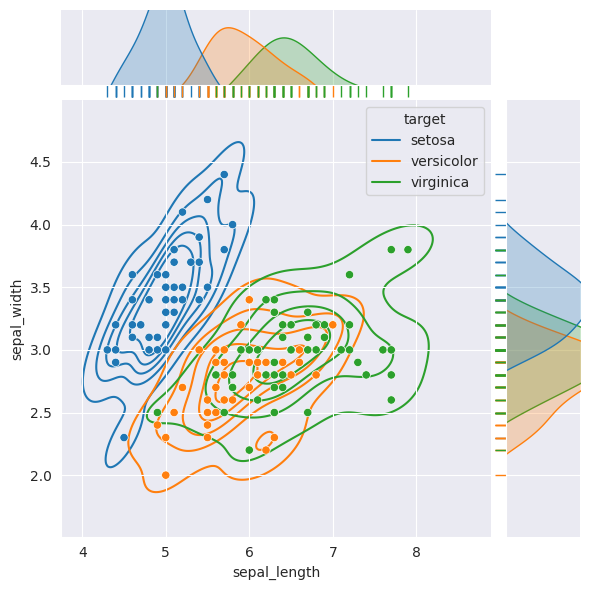

In [36]:
g = sn.jointplot(data=df, x="sepal_length", y="sepal_width", hue="target")
g.plot_joint(sn.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sn.rugplot, color="r", height=-.15, clip_on=False)

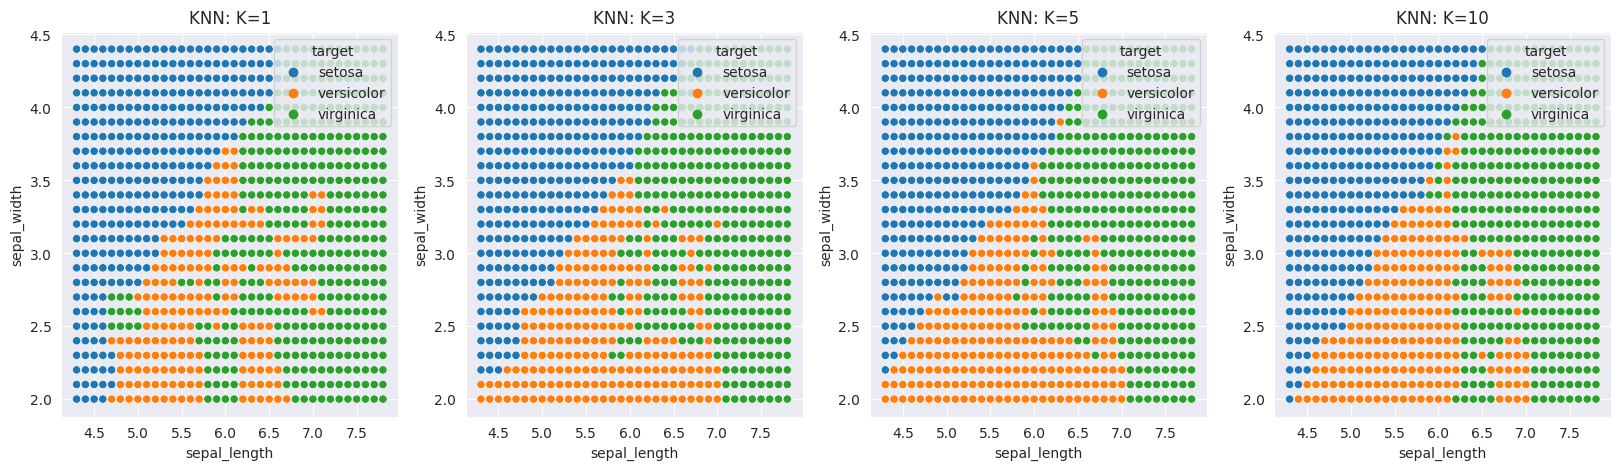

In [37]:
from sklearn.neighbors import KNeighborsClassifier


def generate_scatterplot_from_model(model, title, axis):
    cmap = {
        "setosa": "blue",
        "versicolor": "orange",
        "virginica": "green",
    }
    data = [[length, width, model.predict(np.array([length, width]).reshape(1, -1))[0]]
            for length in np.arange(df["sepal_length"].min(), df["sepal_length"].max(), 0.1)
            for width in np.arange(df["sepal_width"].min(), df["sepal_width"].max(), 0.1)]
    res = pd.DataFrame(data, columns=["sepal_length", "sepal_width", "target"])
    sn.scatterplot(data=res, x="sepal_length", y="sepal_width", hue="target", ax=axis, hue_order=cmap.keys())
    axis.set_title(title)


_, ax = plt.subplots(1, 4, figsize=(20, 5))

X = df[["sepal_length", "sepal_width"]]
y = df["target"]

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X.values, y.values)
generate_scatterplot_from_model(knn, "KNN: K=1", ax[0])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X.values, y.values)
generate_scatterplot_from_model(knn, "KNN: K=3", ax[1])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X.values, y.values)
generate_scatterplot_from_model(knn, "KNN: K=5", ax[2])

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X.values, y.values)
generate_scatterplot_from_model(knn, "KNN: K=10", ax[3])

plt.show()

## KNN - Regression
Use vector y of output values of the K nearest neighbors N to predict output.

- Unweighted combination: use, e.g. mean or median to derive new output value
- Weighted combination: use distance to new sample to weight output values during combination:
  $ Y_S = \frac{\sum_{n} Y_n\cdot d(N_n)}{\sum_n d(N_n)} $
  with `d` being the distance function of the nth sample.


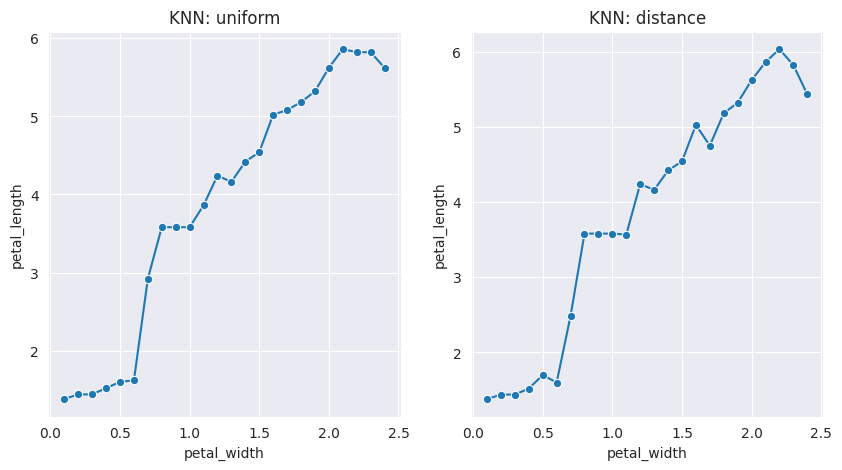

In [38]:
from sklearn.neighbors import KNeighborsRegressor

def generate_lineplot_from_model(model, title, axis):
    data = pd.DataFrame([[width, model.predict([[width]])[0]] for width in np.arange(df["petal_width"].min(), df["petal_width"].max(), 0.1)], columns=["petal_width", "petal_length"])
    sn.lineplot(data, x="petal_width", y="petal_length", ax=axis, marker="o")
    axis.set_title(title)


_, ax = plt.subplots(1, 2, figsize=(10, 5))
X = df[["petal_width"]]
y = df["petal_length"]

knn = KNeighborsRegressor(n_neighbors=5, weights="uniform")
knn.fit(X.values, y.values)
generate_lineplot_from_model(knn, "KNN: uniform", ax[0])

knn = KNeighborsRegressor(n_neighbors=5, weights="distance")
knn.fit(X.values, y.values)
generate_lineplot_from_model(knn, "KNN: distance", ax[1])

## Linear Regression (Linear Model)
- for n dimensional data is a flat hyperplane in n-1 dimensions to approximate data (regression) or separate data (classification)
- Cannot capture non-linear relations (curves)
- Called "linear model" LM
- Model parameters (2D example)
    - $y = kx + d$: `k`, `d` are the parameters
    - $ax + by + c = 0$, model parameters: `a`, `b`, `c`
- No Hyperparameters
    - The one parameter would be the polynomial degree which is a constant `1`.

### Effect of Outliers on Linear Regression
Regression tries to minimize error of the error function by fitting the hyperplane to the data.
With outliers the hyperplane might be moved towards outliers.
It should be where the majority of data is.
By changing the error function the model will react differently to outliers.
Multidimensional data makes this problem hard to recognize.

To find errors in the linear model plot predicted and observed values.
If the predicted values show a curve the linear model might be the wrong model, as the output indicates that the data is non-linear.
This will show tendencies of predictions.
- Bias: visible as offset
- Variance: visible as spread

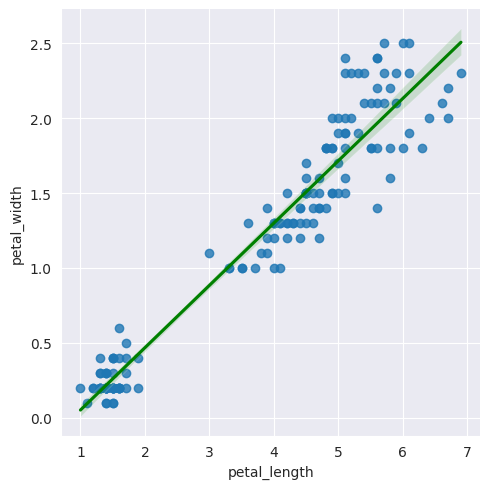

In [39]:
g = sn.lmplot(data=df, x='petal_length', y='petal_width', line_kws={'color': 'g'})

## Logistic “Logit” Regression - Classifier
A modified linear regression for classification.
The hyperplane is used to separate classes of data.
The output is in the range $[0, 1]$ the closer it is to `0` or `1` the higher the probability, that it belongs to the corresponding class.
This output is derived using logistic functions.



## Polynomial Regressor
Fits non-linear nth degree polynomial to non-linear data, but is internally a linear equation system.
This is calculated as matrix operations internally.

This model will overfit if the polynomial degree is too high:
Higher polynomial degree = higher model complexity = easier overfitting.

Regression and Extrapolation is a common pitfall, as linear and polynomial functions will extrapolate data, since they are functions.
The resulting extrapolation might be false.


Text(0.5, 1.0, 'degree=10')

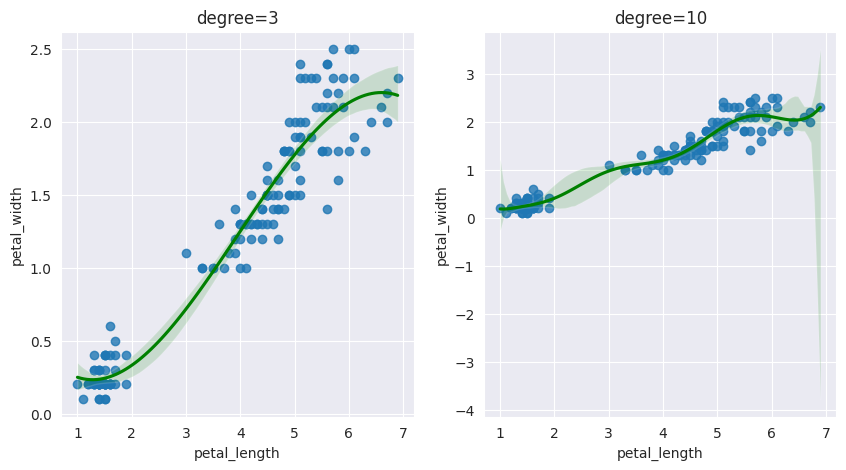

In [40]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
sn.regplot(df, x='petal_length', y='petal_width', line_kws={'color': 'g'}, order=3, ax=ax[0])
ax[0].set_title("degree=3")
sn.regplot(df, x='petal_length', y='petal_width', line_kws={'color': 'g'}, order=10, ax=ax[1])
ax[1].set_title("degree=10")

## Other Regressors
### Partial Least Squares Regression


# Formulas
## Multiclass Problem: 1 vs 1

Every class is compared to every other class:
$$\frac{n\cdot(n-1)}{2}$$

## Logistic Functions
Distance to class separation represents the probability of a sample belonging to a class.
The logistic function calculates a prediction value for the range $[0, L]$.

$L$ ... is the upper bound (IDK why it is not 1 per default)

$$f(x) = \frac{L}{1+e^{-k(x-x_0)}}$$

## Mean, Median, SD and MAD
All can be used for feature derivation

### Mean and Median
Show the "center" of samples distribution.
Median is considered more statistically robust(to outliers) than mean

### SD and median absolut deviation (MAD)
Shows the scatter of samples. Again MAD is more robust than SD.

SD Formula:
$\mu$=mean

$$
  SD=\sqrt{\frac{\sum (x_{i}-\mu)^2}{N}}
$$

MAD Formula:
`X` is the series of samples.
`m(X)` can be arithmetic mean, median or mode, but for median absolute deviation it is the median!

$$
  MAD=\vert\frac{1}{n}\sum_{i=1}^n x_{i} - median(X)\vert
$$

**MEDIAN and MAD are not impacted by outliers!!!**

## True/False Positive/Negative Rates

True Positive Rate:
$$

$$

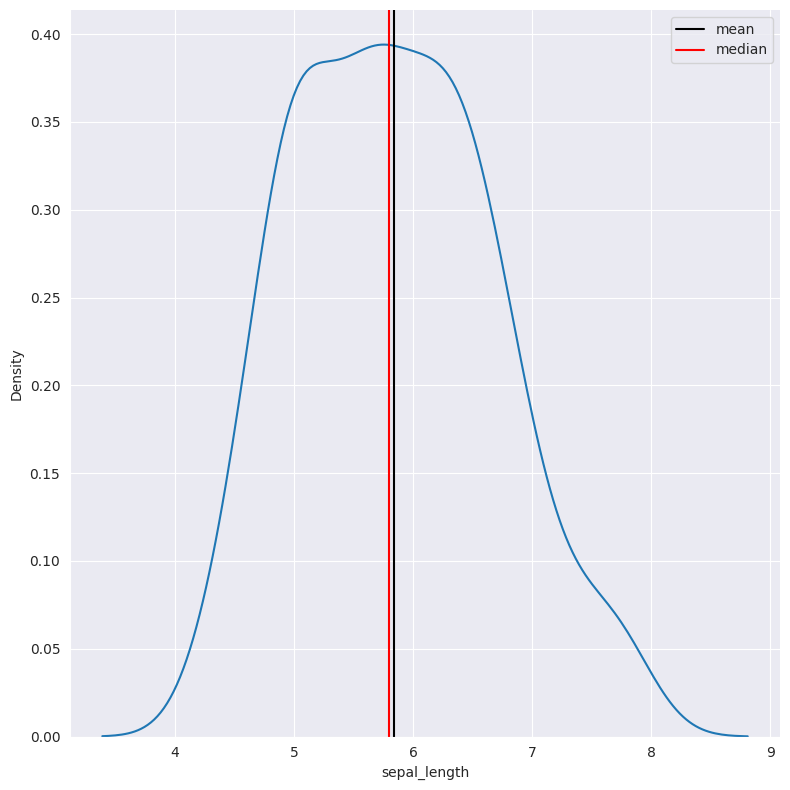

In [41]:
sn.displot(df, x="sepal_length", kind="kde", height=8)
plt.axvline(x=df["sepal_length"].mean(), color='black', label="mean")
plt.axvline(x=df["sepal_length"].median(), color='red', label="median")
plt.legend(loc=0)
plt.show()

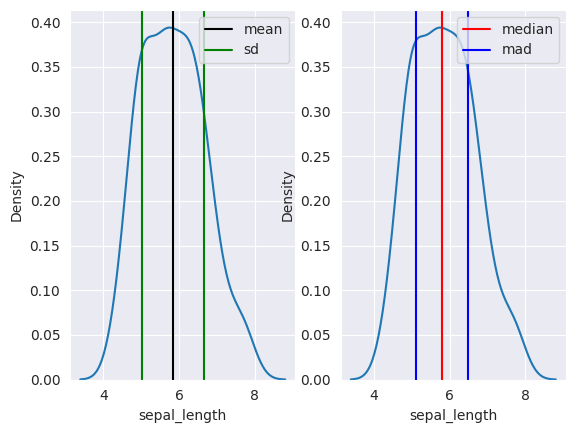

In [42]:
_, ax = plt.subplots(1, 2)
mean = df["sepal_length"].mean()
sd = df["sepal_length"].std()
median = df["sepal_length"].median()
mad = (df["sepal_length"] - df["sepal_length"].mean()).abs().mean()

sn.kdeplot(df, x="sepal_length", ax=ax[0])
ax[0].axvline(x=mean, color='black', label="mean")
ax[0].axvline(x=mean + sd, color='green', label="sd")
ax[0].axvline(x=mean - sd, color='green')
ax[0].legend(loc=0)

sn.kdeplot(df, x="sepal_length", ax=ax[1])
ax[1].axvline(x=median, color='red', label="median")
ax[1].axvline(x=median + mad, color='blue', label="mad")
ax[1].axvline(x=median - mad, color='blue')
ax[1].legend(loc=1)
plt.show()

## Regression Error Measures
**These can be used outside of regression as well**

- **BAD** Absolute error $ = \sum\vert E_n \vert $, scales with the amount of samples
- **Mean absolute error** $ = \sum\frac{\vert E_n \vert}{n} $
- **Median absolute error** $ = median(\vert E_n \vert) $, more robust to outliers.
Careful: both mean and median absolute error are sometimes abbreviated as MAE
- Sum of squared errors SSE $ = \sum E_n^2 $, weights outliers stronger. Used in linear regression software
- Mean squared error MSE $ = \sum\frac{E_n^2}{n} $, normalizes the SSE
- **Root mean squared error** RMSE $ = \sqrt{\sum\frac{E_n^2}{n}} $, used frequently. Regression with MSE or RMSE is called Least Squares Regression.